In [14]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score




In [3]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
# PATH_TO_DATA = '...'  # TODO make cross

# Imbalanced datasets


## Table of content
1. [What is imbalanced dataset](#imbalanced-dataset)
    1. [How Know if data not balanced](#)
    2. [Side effects](#)
    3. [Can we learn from imbalanced data](#)
    4. [What to do ?](#)
2. [Oversampling](#oversampling)
    1. [solutions](#)
    2. [limitations](#)
3. [Undersampling](#undersampling)
    1. [solutions](#)
    2. [limitations](#)
4. [Combine Oversampling and Undersampling](#)
5. [In practice](#in-practice)
6. [Summary](#summary)
7. [What Next ?](#what-next)
8. [Resources](#resources)

## Imbalanced dataset
<a id="imbalanced-dataset"></a>

**Imbalanced dataset** when number of samples which belong to one class dominate the whole dataset.

> " A dataset is imbalanced if at least one of the classes constitutes only a very small minority. " [[3.3.]](#resources)

<!-- ![img](./images/imbalanced-data.png) -->
<figure>
    <figcaption>img. src [4.1.]</figcaption>
    <img src="./images/imbalanced-data.png" width="400" height="400" />
</figure>


1. Does imbalanced dataset appear just in binary dataset? No.
2. Does imbalanced dataset appear in multi label dataset? Yes.

> Imbalanced data prevail in banking, insurance, engineering, and many other fields. It is common in fraud detection that the imbalance is on the order of 100 to 1.

### How Know if data not balanced
1. count number of samples in every class.
2. make bar plot where the length encode number of samples per class.
3. make scatter plot of data, select two features from dataset color of every sample represent to which class belong.
4. ...

### Side effects
Imbalanced dataset can cause bad side effects on ML algo. like neural networks, SVM etc.

1. ML will ignore the minority class entirely.
2. When we split data into train/test could be a big chance to ignore the minority class samples in training data.
3. ...


The learning phase and the subsequent prediction of machine learning algorithms can be affected by the problem of imbalanced data set. The balancing issue corresponds to the difference of the number of samples in the different classes. We illustrate the effect of training a linear SVM classifier with different level of class balancing.[[3.2.]](#resources)

<figure>
    <figcaption>img. src [4.2.]</figcaption>
    <img src="./images/sphx_glr_plot_comparison_over_sampling_0011.png"/>
</figure>




### Can we learn from imbalanced data
> TODO ...

### What to do ?
1. Undersampling.
2. Oversampling.
3. Combination of over-under sampling.
4. ...

**Oversampling and undersampling** a set of techniques used to adjust the ratio of samples in dataset. [[3.1.]](#resources)

> [Imbalanced learn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)

> TODO ...

<figure>
    <figcaption>img. src [4.3.]</figcaption>
    <img src="./images/oversampling-undersampling.png"/>
</figure>


In [7]:
# Make imbalanced dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=1
)

idx0 = np.where(y == 0)[0]
idx1 = np.where(y == 1)[0]

# Make imbalanced data frame
df = pd.DataFrame({
    'f1': X[:,0],
    'f2': X[:,1],
    'y': y,
})

df.head(5)

,f1,f2,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0


In [193]:
df.y.value_counts()

0    9900
1     100
Name: y, dtype: int64

In [194]:
df.groupby('y').count()

,f1,f2
y,,
0,9900,9900
1,100,100


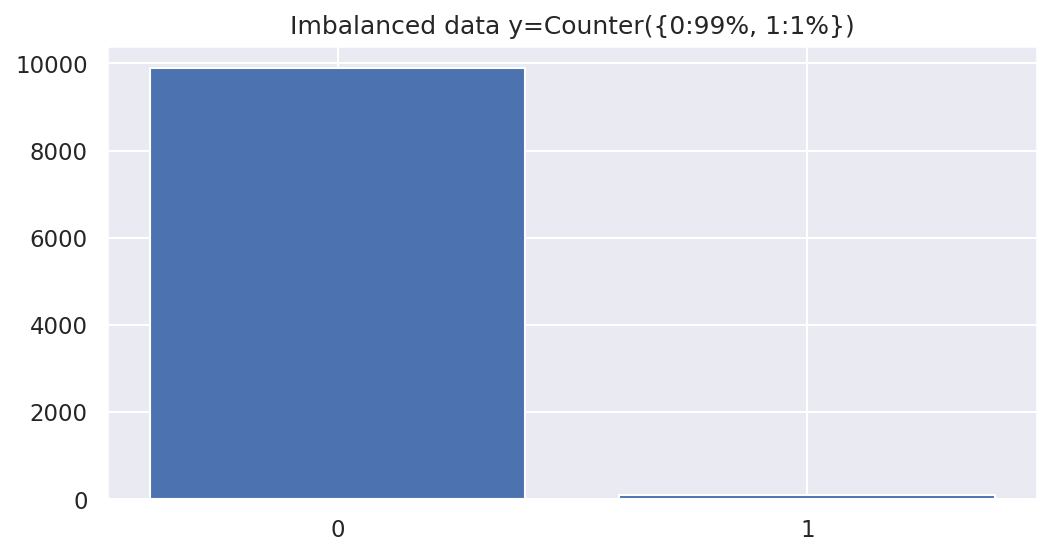

In [195]:
plt.figure(figsize=(8, 4), dpi=150)
plt.bar([0, 1], df.y.value_counts())

plt.title('Imbalanced data y=Counter({0:99%, 1:1%})')
plt.xticks([0, 1], ('0', '1'))

plt.show();

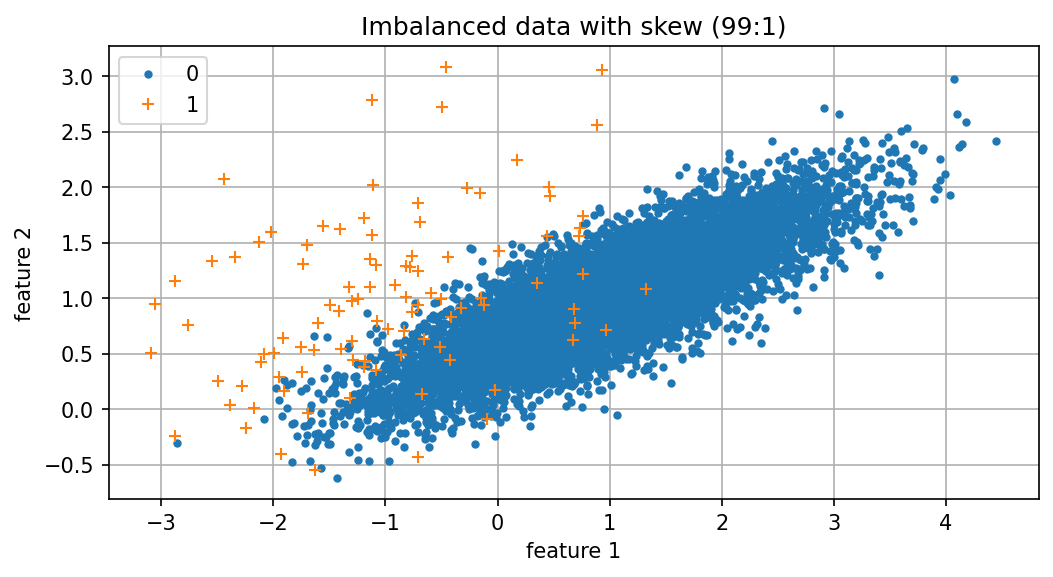

In [8]:
# scetter plot ...
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(X[idx0, 0], X[idx0, 1], '.', label='0')
plt.plot(X[idx1, 0], X[idx1, 1], '+', label='1')

plt.title('Imbalanced data with skew (99:1)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid()
plt.show();

## Oversampling

Generate new samples in the classes which are under-represented (Majority), the most naive strategy is to generate new samples randomly.

## Undersampling

Remove samples in the classes which are over-represented (Majority), the most naive strategy is randomly removing.

## Combine Oversampling and Undersampling

> TODO ...

## In practice
<a id="in-practice"></a>

In [196]:
df.describe()

,f1,f2,y
count,10000.000000,10000.000000,10000.000000
mean,0.966733,0.997252,0.010000
std,0.950270,0.467640,0.099504
min,-3.091974,-0.622193,0.000000
25%,0.335374,0.686097,0.000000
50%,0.965995,0.998290,0.000000
75%,1.605024,1.307164,0.000000
max,4.447943,3.087821,1.000000


In [9]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
idx_train_imb0 = np.where(y_train_imb == 0)[0]
idx_train_imb1 = np.where(y_train_imb == 1)[0]

idx_test_imb0 = np.where(y_test_imb == 0)[0]
idx_test_imb1 = np.where(y_test_imb == 1)[0]

print('Train set = {}, class_0 = {}, class_1 = {}'.format(
    len(y_train_imb),
    len(y_train_imb[idx_train_imb0]),
    len(y_train_imb[idx_train_imb1])
))

print('Train set = {}, class_0 = {}, class_1 = {}'.format(
    len(y_test_imb),
    len(y_test_imb[idx_test_imb0]),
    len(y_test_imb[idx_test_imb1])
))

Train set = 6700, class_0 = 6632, class_1 = 68
Train set = 3300, class_0 = 3268, class_1 = 32


In [11]:
# Models ...

RandomForestClassifier_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])


LogisticRegression_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())
])


KNeighborsClassifier_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier())
])

In [15]:
# Fit ...
RandomForestClassifier_pipe.fit(x_train_imb, y_train_imb)
LogisticRegression_pipe.fit(x_train_imb, y_train_imb)
KNeighborsClassifier_pipe.fit(x_train_imb, y_train_imb)

acc = {
    'classifier': [],
    'train_acc': [],
    'test_acc': [],
    'precision_train': [],
    'recall_train': [],
    'precision_test': [],
    'recall_test': [],
    'f1_train': [],
    'f1_test': [],
}

for name, clf in zip(
    ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier'],
    [RandomForestClassifier_pipe, LogisticRegression_pipe, KNeighborsClassifier_pipe]):
    acc['classifier'].append(name)
    acc['train_acc'].append(round(clf.score(x_train_imb, y_train_imb), 3))
    acc['test_acc'].append(round(clf.score(x_test_imb, y_test_imb), 3))

    acc['precision_train'].append(round(precision_score(y_train_imb, clf.predict(x_train_imb)), 3))
    acc['recall_train'].append(round(recall_score(y_train_imb, clf.predict(x_train_imb)), 3))
    acc['f1_train'].append(round(f1_score(y_train_imb, clf.predict(x_train_imb)), 3))

    acc['precision_test'].append(round(precision_score(y_test_imb, clf.predict(x_test_imb)), 3))
    acc['recall_test'].append(round(recall_score(y_test_imb, clf.predict(x_test_imb)) ,3))
    acc['f1_test'].append(round(f1_score(y_test_imb, clf.predict(x_test_imb)) ,3))

accuracy_imb_df = pd.DataFrame(acc)
accuracy_imb_df

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,1.000,0.993,1.000,1.000,0.700,0.438,1.000,0.538
1,LogisticRegression,0.995,0.993,0.927,0.559,0.812,0.406,0.697,0.542
2,KNeighborsClassifier,0.995,0.993,0.929,0.574,0.812,0.406,0.709,0.542


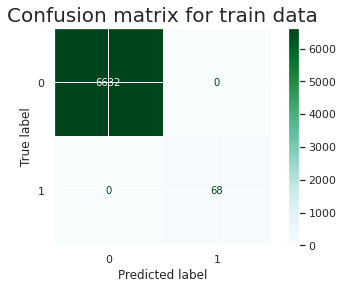

In [256]:
# V1. ...
# y_train_imb_pred = RandomForestClassifier_pipe.predict(x_train_imb)
# print('Confusion matrix for train data')
# confusion_matrix(y_train_imb, y_train_imb_pred)

# V2. ...
plot_confusion_matrix(RandomForestClassifier_pipe, x_train_imb, y_train_imb, cmap="BuGn")
plt.title('Confusion matrix for train data', fontsize='20')
plt.show();

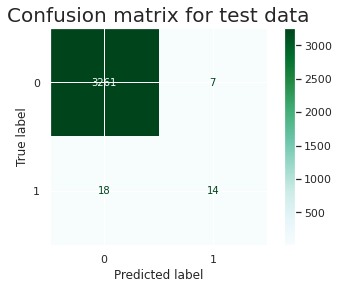

In [257]:
# V1. ...
# y_test_imb_pred = RandomForestClassifier_pipe.predict(x_test_imb)
# print('Confusion matrix for test data')
# confusion_matrix(y_test_imb, y_test_imb_pred)

# V2. ...
plot_confusion_matrix(RandomForestClassifier_pipe, x_test_imb, y_test_imb, cmap="BuGn")
plt.title('Confusion matrix for test data', fontsize='20')
plt.show();

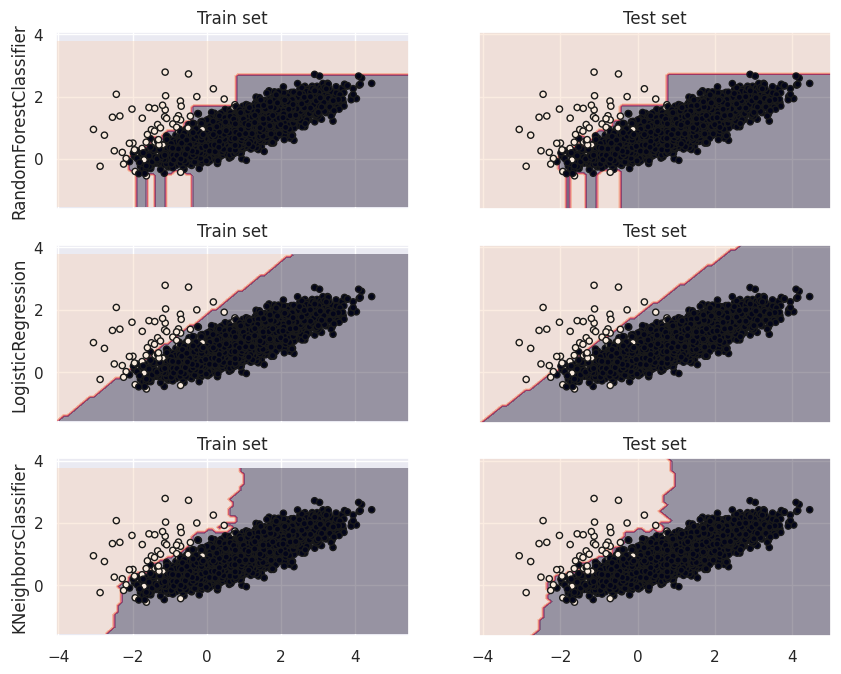

In [294]:
# Plotting decision regions
f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8), dpi=100)

for i, clf, clf_title in zip(
    [0,1,2],
    [RandomForestClassifier_pipe, LogisticRegression_pipe, KNeighborsClassifier_pipe],
    ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier'],
    ):
    axarr[i, 0].set(ylabel=clf_title)
    for j, X_, title in zip(
        [0, 1],
        [x_train_imb, x_test_imb],
        ['Train set', 'Test set']):
        # ...
        x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
        y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        # ...
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[i, j].contourf(xx, yy, Z, alpha=0.4)
        axarr[i, j].scatter(x_train_imb[:, 0], x_train_imb[:, 1], c=y_train_imb, s=20, edgecolor='k')
        axarr[i, j].set_title(title)


plt.show();

# TODO

https://www.google.com/search?q=under-sampling&oq=under-sam&aqs=chrome.1.69i57j0l6j69i60.4745j0j7&sourceid=chrome&ie=UTF-8


https://www.google.com/search?q=oversampling+undersampling&hl=pl&sxsrf=ALeKk031-jdzqaKJnxHf2CmIMMtd73RRzQ:1594037502718&source=lnms&sa=X&ved=0ahUKEwi1re64zLjqAhVDxosKHRtpD1UQ_AUICSgA&biw=1536&bih=722&dpr=1.25


https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/



https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39

## Summary
<a id="summary"></a>


1. The balancing issue corresponds to the difference of the number of samples in the different classes.

## What Next ?
<a id="what-next"></a>

1. Library
> [Imbalanced learn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)
2. Book
> TODO ...

## Resources
<a id="resources"></a>

### Books

### Papers

### Web
1. [[3.1.] Wiki, Oversampling and undersampling in data analysis](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)
2. [[3.2.] Introduction](https://imbalanced-learn.readthedocs.io/en/stable/introduction.html)
3. [[3.3.] Using Under-Sampling Techniques for Extremely Imbalanced Data](https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8)

### Images
1. [[4.1.] dealing with imbalanced data](https://medium.com/@SeoJaeDuk/archived-post-dealing-with-imbalanced-data-577f024c8681)
2. [[4.2.] Problem statement regarding imbalanced data sets](https://imbalanced-learn.readthedocs.io/en/stable/introduction.html)